# Color Tag Detection using OpenCV 

In [7]:
#The line below is necesary to show Matplotlib's plots inside a Jupyter Notebook
%matplotlib inline

import cv2  
from matplotlib import pyplot as plt #For plotting
import numpy as np

In [8]:
def preprocess_img(img):
    #Grayscale the input image, set it to black and white
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #The assumption is all cards we want to read has white border
    #Setting a white threshold to capture it
    _, thresh_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)
    
    #Median Blur the threshold image for smoothing
    gblur_img = cv2.GaussianBlur(thresh_img, (5, 5), 2)
    
    #Capturing the edge of image, we are looking for rectangle edge of card
    canny_img = cv2.Canny(gblur_img, 0, 0)
    return canny_img

def detect_card(process_img):
    #Finding the contours of processed img
    contours, _ = cv2.findContours(process_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    #Locating the rectangle and cropping it out to return it
    r1, r2 = sorted(contours, key=cv2.contourArea)[-3:-1]
    x, y, w, h = cv2.boundingRect(np.r_[r1, r2])
    crop_img = img[y:y+h, x:x+w]
    return crop_img 

In [9]:
#Function for detecting edges
def auto_canny(image, sigma=0.33):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    return edged


def preprocess_crop(crop_img):
    #Sharpen image is required as edge is not obvious for white square
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    shrp_img = cv2.filter2D(crop_img, ddepth=-1, kernel=kernel)
    
    #Blurr to smoothen image
    blurred = cv2.GaussianBlur(shrp_img, (3, 3), 0)
    
    #Detecting Edges of squares
    auto_edge = auto_canny(blurred)
    
    #Image dilation to have even clearer view of squares
    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
    dst=cv2.morphologyEx(auto_edge, cv2.MORPH_DILATE, se)
    
    #Finding the contours of processed img
    contours, _ = cv2.findContours(dst, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    contour_img = cv2.drawContours(dst, contours, -1, (0,255,0), 3)
    
    return contours, contour_img

def color_chk(img):
    average = img.mean(axis=0).mean(axis=0)
    print("RGB:", average)
    return average
    
def detect_square(contours):
    min_area = 100
    max_area = 1000
    image_number = 0
    for c in contours:
        area = cv2.contourArea(c)
        if area > min_area and area < max_area:
            x,y,w,h = cv2.boundingRect(c)
            result = crop_img[y:y+h, x:x+w]
            result = cv2.resize(result, (100, 100), interpolation = cv2.INTER_LINEAR)
            cv2.imwrite('subimage_{}.png'.format(image_number), result)
            rgb = color_chk(result) #Call the color check function every iteration
            plt.imshow(result)
            plt.show()
            print("sub image saved!")

            cv2.rectangle(crop_img, (x, y), (x + w, y + h), (36,255,12), 1)
            image_number += 1

RGB: [104.6964 148.7893 187.3595]


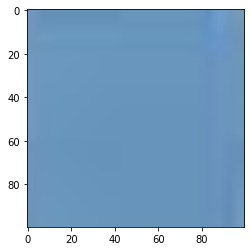

sub image saved!
RGB: [ 70.3114 243.4772 252.2623]


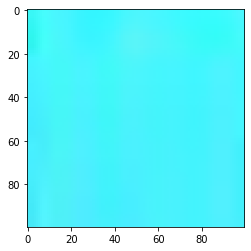

sub image saved!
RGB: [125.7609  68.7892 227.3209]


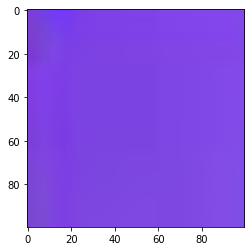

sub image saved!
RGB: [217.1505 144.4986   6.9537]


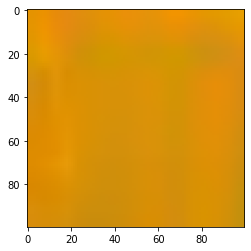

sub image saved!
RGB: [143.2454 181.1842 207.8376]


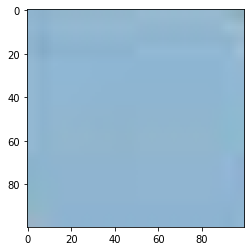

sub image saved!
RGB: [31.2148 28.0539 27.3034]


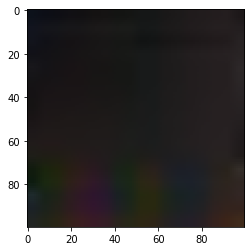

sub image saved!
RGB: [248.5736 253.6126 252.3977]


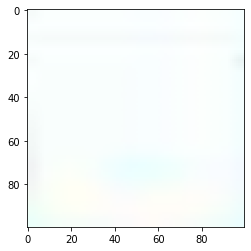

sub image saved!
RGB: [131.4394 136.641  134.4481]


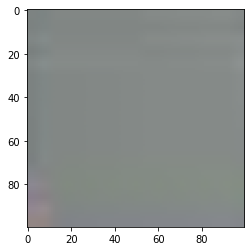

sub image saved!


In [10]:
#Initialize
if __name__ == "__main__":
    img = cv2.imread('Q1_image.jpg')
    #Process the initial image
    process_img = preprocess_img(img)
    #Crop out the card 
    crop_img = detect_card(process_img)
    
    #Process the cropped image
    contours, contour_img = preprocess_crop(crop_img)
    #Detect squares from cropped image
    detect_square(contours)

### Below are the explanations and thought process

This solution consist of two steps:
1. To capture the card from the image, then crop it out
2. Analyze this card, identify all the square boxes and their colors

Please run all cells below.

### Step 1: To capture the card

#### Libraries

In [11]:
#The line below is necesary to show Matplotlib's plots inside a Jupyter Notebook
%matplotlib inline

import cv2  
from matplotlib import pyplot as plt #For plotting
import numpy as np

#### Preprocessing

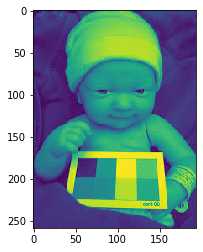

In [12]:
#Loading Sample Image
img = cv2.imread('Q1_image.jpg')
#Grayscale the input image, set it to black and white
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Show the image with matplotlib
plt.imshow(gray_img)
plt.show()

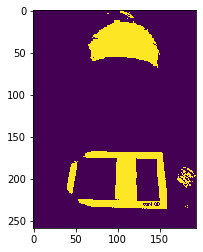

In [13]:
#The assumption is all cards we want to read has white border
#Setting a white threshold to capture it
_, thresh_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)

#Show the image with matplotlib
plt.imshow(thresh_img)
plt.show()

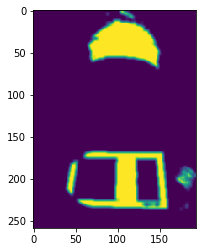

In [14]:
#Median Blur the threshold image for smoothing
gblur_img = cv2.GaussianBlur(thresh_img, (5, 5), 2)

#Show the image with matplotlib
plt.imshow(gblur_img)
plt.show()

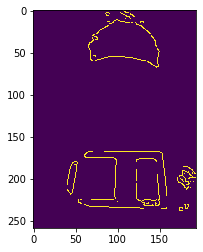

In [15]:
#Capturing the edge of image, we are looking for rectangle edge of card
canny_img = cv2.Canny(gblur_img, 0, 0)

#Show the image with matplotlib
plt.imshow(canny_img)
plt.show()

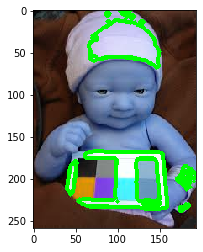

In [16]:
#Finding the contours of processed img
contours, _ = cv2.findContours(canny_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

#Show the image with matplotlib
contour_img = cv2.drawContours(img, contours, -1, (0,255,0), 3) #<<< Not necessary in main code, just for understanding
plt.imshow(contour_img)
plt.show()

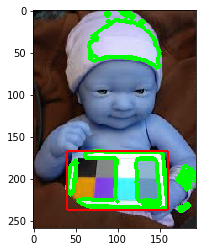

In [17]:
#Locating the rectangle and drawing it out in the image
r1, r2 = sorted(contours, key=cv2.contourArea)[-3:-1]
x, y, w, h = cv2.boundingRect(np.r_[r1, r2])
cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)


plt.imshow(img)
plt.show()

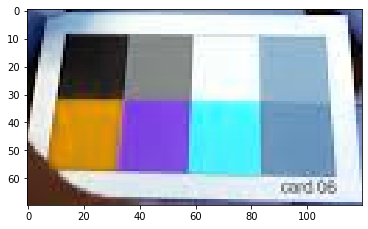

In [18]:
#Cropping the image out
img = cv2.imread('Q1_image.jpg')
crop_img = img[y:y+h, x:x+w]
plt.imshow(crop_img)
plt.show()

#### Function created for Step 1

In [19]:
#With this we pack them into a detect card function

def preprocess_img(img):
    #Grayscale the input image, set it to black and white
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #The assumption is all cards we want to read has white border
    #Setting a white threshold to capture it
    _, thresh_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)
    
    #Median Blur the threshold image for smoothing
    gblur_img = cv2.GaussianBlur(thresh_img, (5, 5), 2)
    
    #Capturing the edge of image, we are looking for rectangle edge of card
    canny_img = cv2.Canny(gblur_img, 0, 0)
    return canny_img

def detect_card(process_img):
    #Finding the contours of processed img
    contours, _ = cv2.findContours(process_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    #Locating the rectangle and cropping it out to return it
    r1, r2 = sorted(contours, key=cv2.contourArea)[-3:-1]
    x, y, w, h = cv2.boundingRect(np.r_[r1, r2])
    crop_img = img[y:y+h, x:x+w]
    return crop_img 

### Step 2: Capture square & read colors

In [20]:
#Call the functions from step 1 to get cropped image 
img = cv2.imread('Q1_image.jpg')
process_img = preprocess_img(img)
crop_img = detect_card(process_img)

#### Preprocessing

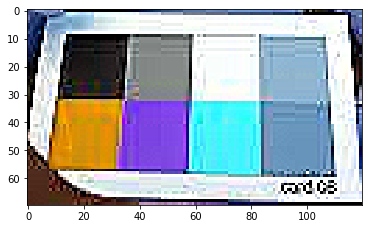

In [21]:
#Sharpen image is required as edge is not obvious for white square
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
shrp_img = cv2.filter2D(crop_img, ddepth=-1, kernel=kernel)

plt.imshow(shrp_img)
plt.show()

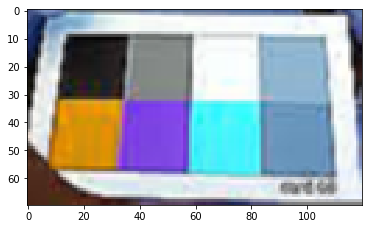

In [22]:
#Blurr to smoothen image
blurred = cv2.GaussianBlur(shrp_img, (3, 3), 0)
plt.imshow(blurred)
plt.show()

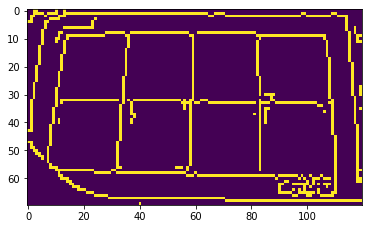

In [23]:
#Detecting Edges of squares
def auto_canny(image, sigma=0.33):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    return edged


auto_edge = auto_canny(blurred)
plt.imshow(auto_edge)
plt.show()

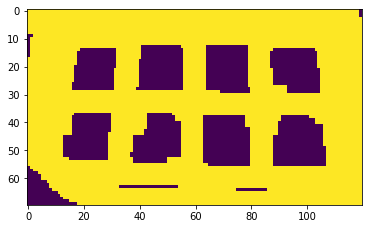

In [24]:
#Image dilation to have even clearer view of squares
se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
dst=cv2.morphologyEx(auto_edge, cv2.MORPH_DILATE, se)
plt.imshow(dst)
plt.show()

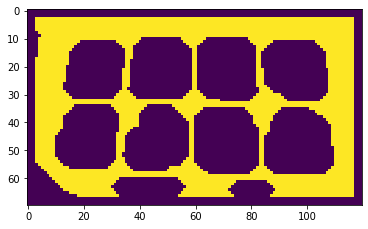

In [25]:
#Finding the contours of processed img
contours, _ = cv2.findContours(dst, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

#Show the image with matplotlib
contour_img = cv2.drawContours(dst, contours, -1, (0,255,0), 3) #<<< Not necessary in main code, just for understanding
plt.imshow(contour_img)
plt.show()

In [26]:
#Not compulsory, to check the average RGB of each squares
def color_chk(img):
    average = img.mean(axis=0).mean(axis=0)
    print("RGB:", average)
    return average

RGB: [104.6964 148.7893 187.3595]


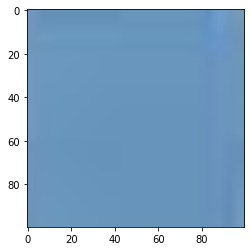

sub image saved!
RGB: [ 70.3114 243.4772 252.2623]


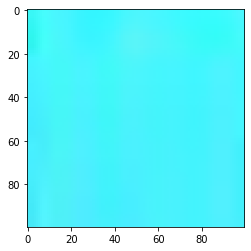

sub image saved!
RGB: [125.7609  68.7892 227.3209]


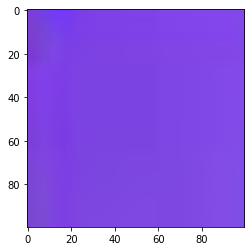

sub image saved!
RGB: [217.1505 144.4986   6.9537]


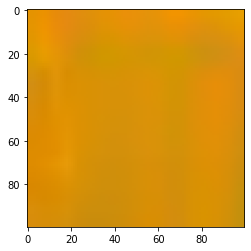

sub image saved!
RGB: [143.2454 181.1842 207.8376]


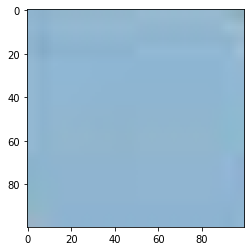

sub image saved!
RGB: [31.2148 28.0539 27.3034]


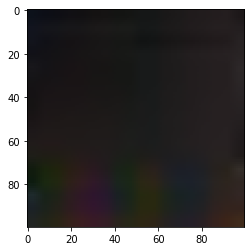

sub image saved!
RGB: [248.5736 253.6126 252.3977]


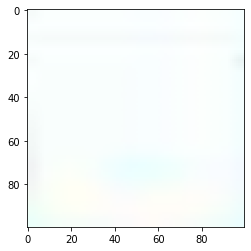

sub image saved!
RGB: [131.4394 136.641  134.4481]


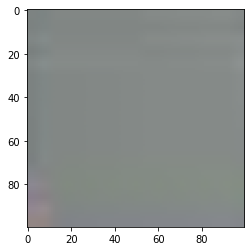

sub image saved!


In [27]:
#Based on the contour, detect the squares, crop them and save as independent files. 
min_area = 100
max_area = 1000
image_number = 0
for c in contours:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv2.boundingRect(c)
        result = crop_img[y:y+h, x:x+w]
        result = cv2.resize(result, (100, 100), interpolation = cv2.INTER_LINEAR)
        cv2.imwrite('subimage_{}.png'.format(image_number), result)
        rgb = color_chk(result) #Call the color check function every iteration
        plt.imshow(result)
        plt.show()
        print("sub image saved!")

        cv2.rectangle(crop_img, (x, y), (x + w, y + h), (36,255,12), 1)
        image_number += 1


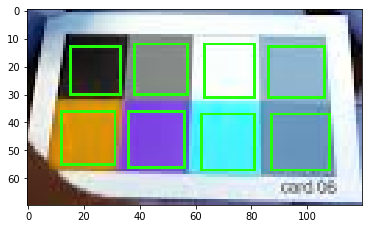

In [28]:
plt.imshow(crop_img)
plt.show()   

#### Function created for Step 2

In [29]:
#With this we pack them into a detect squares function

def auto_canny(image, sigma=0.33):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    return edged


def preprocess_crop(crop_img):
    #Sharpen image is required as edge is not obvious for white square
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    shrp_img = cv2.filter2D(crop_img, ddepth=-1, kernel=kernel)
    
    #Blurr to smoothen image
    blurred = cv2.GaussianBlur(shrp_img, (3, 3), 0)
    
    #Detecting Edges of squares
    auto_edge = auto_canny(blurred)
    
    #Image dilation to have even clearer view of squares
    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
    dst=cv2.morphologyEx(auto_edge, cv2.MORPH_DILATE, se)
    
    #Finding the contours of processed img
    contours, _ = cv2.findContours(dst, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    contour_img = cv2.drawContours(dst, contours, -1, (0,255,0), 3)
    
    return contours, contour_img

def color_chk(img):
    average = img.mean(axis=0).mean(axis=0)
    print("RGB:", average)
    return average
    
def detect_square(contours):
    min_area = 100
    max_area = 1000
    image_number = 0
    for c in contours:
        area = cv2.contourArea(c)
        if area > min_area and area < max_area:
            x,y,w,h = cv2.boundingRect(c)
            result = crop_img[y:y+h, x:x+w]
            result = cv2.resize(result, (100, 100), interpolation = cv2.INTER_LINEAR)
            cv2.imwrite('subimage_{}.png'.format(image_number), result)
            rgb = color_chk(result) #Call the color check function every iteration
            plt.imshow(result)
            plt.show()
            print("sub image saved!")

            cv2.rectangle(crop_img, (x, y), (x + w, y + h), (36,255,12), 1)
            image_number += 1